In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [101]:
# Load of results
## move to beacon
learningBeaconResults = pd.read_csv('agents/learningMoveToBeaconReward.csv',index_col=0)
##  collect minerals
learningCollectMineralsResults = pd.read_csv('agents/learningCollectMineralsReward.csv',index_col=0)
## collect minerals and gas
learningCollectMineralsAndGasResults = pd.read_csv('agents/learningCollectMineralsAndGasReward.csv',index_col=0)
learningCollectMineralsAndGasResultsV2 = pd.read_csv('agents/learningCollectMineralsAndGasV2Reward.csv',index_col=0)
learningCollectMineralsAndGasResultsV3 = pd.read_csv('agents/learningCollectMineralsAndGasV3Reward.csv',index_col=0)
## build marines results
learningBuildMarinesResults = pd.read_csv('agents/learningBuildMarinesReward.csv',index_col=0)
learningBuildMarinesResultsV2 = pd.read_csv('agents/learningBuildMarinesV2Reward.csv',index_col=0)
learningBuildMarinesResultsV3 = pd.read_csv('agents/learningBuildMarinesV3Reward.csv',index_col=0)
learningBuildMarinesResultsV4 = pd.read_csv('agents/learningBuildMarinesV4Reward.csv',index_col=0)
learningBuildMarinesResultsV5 = pd.read_csv('agents/learningBuildMarinesV5Reward.csv',index_col=0)
learningMarinesRushResults = pd.read_csv('agents/learningRushMarine5Reward.csv',index_col=0)

In [102]:
# Load of q-tables
## move to beacon
learningBeaconTable = pd.read_csv('agents/learningMoveToBeacon.csv',index_col=0)
##  collect minerals
learningCollectMineralsTable = pd.read_csv('agents/learningCollectMinerals.csv',index_col=0)
## collect minerals and gas
learningCollectMineralsAndGasTable = pd.read_csv('agents/learningCollectMineralsAndGas.csv',index_col=0)
learningCollectMineralsAndGasTableV2 = pd.read_csv('agents/learningCollectMineralsAndGasV2.csv',index_col=0)
learningCollectMineralsAndGasTableV3 = pd.read_csv('agents/learningCollectMineralsAndGasV3.csv',index_col=0)
## build marines results
learningBuildMarinesTable = pd.read_csv('agents/learningBuildMarines.csv',index_col=0)
learningBuildMarinesTableV2 = pd.read_csv('agents/learningBuildMarinesV2.csv',index_col=0)
learningBuildMarinesTableV3 = pd.read_csv('agents/learningBuildMarinesV3.csv',index_col=0)
learningBuildMarinesTableV4 = pd.read_csv('agents/learningBuildMarinesV4.csv',index_col=0)
learningBuildMarinesTableV5 = pd.read_csv('agents/learningBuildMarinesV5.csv',index_col=0)
learningMarinesRushTable= pd.read_csv('agents/learningRushMarine5.csv',index_col=0)

In [103]:
# Move To beacon
# as reward for study was used check that unit is standing in beacon

In [104]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_ARMY = 'selectArmy'
ACTION_MOVE_SCREEN = 'moveScreen'
smart_actions_move_to_beacon = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_ARMY,
    ACTION_MOVE_SCREEN,
]

In [105]:
learningBeaconTable = learningBeaconTable.rename(columns={
    '0': smart_actions_move_to_beacon[0],
    '1': smart_actions_move_to_beacon[1],
    '2': smart_actions_move_to_beacon[2]
    })
learningBeaconTable

,donothing,selectArmy,moveScreen
state,,,
"[0, 1]",0.000000,0.000000,0.000000
"[0, 0]",0.048937,0.310948,0.050311
"[1, 0]",0.317923,0.323421,0.323466
"[1, 1]",0.095296,0.347865,0.076054


In [106]:
learningBeaconResults

,reward
0,0.0
1,9.0
2,7.0
3,4.0
4,4.0
...,...
173,25.0
174,27.0
175,25.0
176,21.0


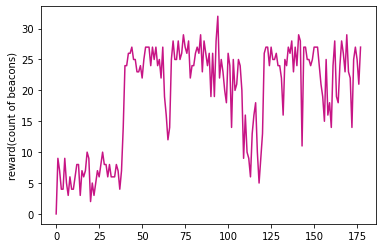

In [107]:
plt.plot('reward', data=learningBeaconResults, color='mediumvioletred')
plt.ylabel('reward(count of beacons)')
plt.show()

In [108]:
# We can see that on simple tasks the bot will study fast, and have good results on compliting the task

In [109]:
#  collect minerals
# as reward was used state that units of bot are standing on position of minerals

In [110]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_ARMY = 'selectArmy'
ACTION_MOVE_SCREEN = 'moveScreen'

smart_actions_collect_minerals = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_ARMY,
    ACTION_MOVE_SCREEN,
]

In [111]:
learningCollectMineralsTable.rename(columns={
    '0': smart_actions_collect_minerals[0],
    '1': smart_actions_collect_minerals[1],
    '2': smart_actions_collect_minerals[2]
    })

,donothing,selectArmy,moveScreen
state,,,
"[0, 1]",0.075064,3.725605,0.111488
"[1, 1]",6.496082,6.369533,6.714530
"[1, 0]",3.601347,3.519149,3.846397
"[0, 0]",0.000000,0.184644,0.000000


In [112]:
learningCollectMineralsResults

,reward
0,0.0
1,35.0
2,19.0
3,36.0
4,20.0
...,...
96,93.0
97,90.0
98,94.0
99,93.0


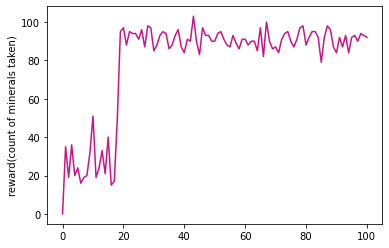

In [113]:
plt.plot('reward', data=learningCollectMineralsResults, color='mediumvioletred')
plt.ylabel('reward(count of minerals taken)')
plt.show()

In [114]:
# Here is the same result as in example with move to beacon

In [115]:
#  collect minerals and gas
## now the task will be more complex, we need to study the bot to collect minreals, to build refineries for getting gas and supply depot to increase amount of workers. Here we were using studies on 3 cases
# we give rewards for getting more minerals, collected gas, busy scv(workers) and for build of workers

In [116]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_BUILD_REFINERY = 'buildRefinery'
ACTION_SELECT_COMMAND_CENTER = 'selectCommandCenter'
ACTION_TRAIN_SCV = 'trainScv'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'

smart_actions_learning_collect_minerals_and_gas = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_BUILD_REFINERY,
    ACTION_SELECT_COMMAND_CENTER,
    ACTION_TRAIN_SCV,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV
]

In [117]:
learningCollectMineralsAndGasTable.rename(columns= {
    '0': smart_actions_learning_collect_minerals_and_gas[0],
    '1': smart_actions_learning_collect_minerals_and_gas[1],
    '2': smart_actions_learning_collect_minerals_and_gas[2],
    '3': smart_actions_learning_collect_minerals_and_gas[3],
    '4': smart_actions_learning_collect_minerals_and_gas[4],
    '5': smart_actions_learning_collect_minerals_and_gas[5],
    '6': smart_actions_learning_collect_minerals_and_gas[6],
    '7': smart_actions_learning_collect_minerals_and_gas[7],
})

,donothing,selectWorker,gather,buildRefinery,selectCommandCenter,trainScv,buildSupplyDepot,selectScv
state,,,,,,,,
"[0, 0, 0, 0, 0, 0]",1.911248,1.882929,1.878655,1.883921,1.902579,1.904405,1.963303,1.900008
"[1, 0, 0, 0, 0, 1]",0.654479,0.792927,0.660536,0.657996,0.660736,0.657352,0.662496,0.661548
"[1, 1, 0, 0, 0, 1]",0.667605,0.664893,0.680935,0.668525,0.732742,0.665179,0.665559,0.669376
"[1, 0, 0, 1, 0, 1]",0.826491,0.947145,0.826440,0.826118,0.828909,0.822439,0.826193,0.826584
"[1, 1, 1, 0, 0, 1]",1.009794,1.034578,1.020292,0.912549,0.976494,0.978497,0.941949,0.975782
"[1, 1, 1, 0, 1, 1]",1.481621,1.746829,1.485288,1.412541,1.029400,1.472461,1.385695,1.472713
"[0, 1, 1, 0, 1, 0]",2.021969,2.026395,2.027278,2.003599,2.028591,2.026280,2.026684,2.024979
"[0, 0, 0, 1, 0, 0]",1.961107,1.964952,1.964038,1.959791,1.972210,1.850746,1.961706,1.965274
"[0, 1, 0, 0, 0, 0]",0.007014,0.004221,0.026753,0.246876,0.042287,0.001962,0.001406,0.004894


In [118]:
learningCollectMineralsAndGasResults = learningCollectMineralsAndGasResults.dropna(subset=['mineral_count'])
learningCollectMineralsAndGasResults

,mineral_count,vispen_count,scv_count,reward
1,1120.0,444.0,16.0,NaN
2,1045.0,28.0,13.0,NaN
3,1280.0,380.0,16.0,NaN
4,915.0,124.0,15.0,NaN
5,1525.0,344.0,17.0,NaN
...,...,...,...,...
937,1065.0,36.0,14.0,NaN
938,15.0,368.0,17.0,NaN
939,785.0,20.0,14.0,NaN
940,1995.0,68.0,13.0,NaN


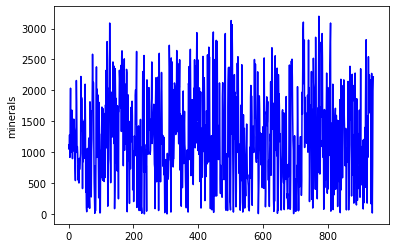

In [119]:
plt.plot('mineral_count', data=learningCollectMineralsAndGasResults, color='blue')
plt.ylabel('minerals')
plt.show()

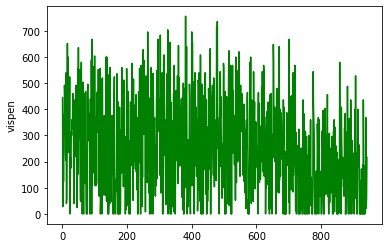

In [120]:
plt.plot('vispen_count', data=learningCollectMineralsAndGasResults, color='green')
plt.ylabel('vispen')
plt.show()

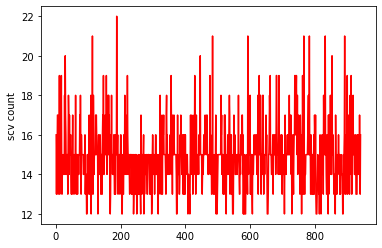

In [121]:
plt.plot('scv_count', data=learningCollectMineralsAndGasResults, color='red')
plt.ylabel('scv count')
plt.show()

In [122]:
# here we see that results in collecting of minerals is not trying to get the best results for it, also in this version sum of collected minerals is less, becuase we don't use information about minerals that was used for build workers and buildings

In [123]:
# version 2 for collect minerals and gas

In [124]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_BUILD_REFINERY = 'buildRefinery'
ACTION_SELECT_COMMAND_CENTER = 'selectCommandCenter'
ACTION_TRAIN_SCV = 'trainScv'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'

smart_actions_learning_collect_minerals_and_gas_v2 = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_BUILD_REFINERY,
    ACTION_SELECT_COMMAND_CENTER,
    ACTION_TRAIN_SCV,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV
]

In [125]:
learningCollectMineralsAndGasTableV2.rename(columns= {
    '0': smart_actions_learning_collect_minerals_and_gas_v2[0],
    '1': smart_actions_learning_collect_minerals_and_gas_v2[1],
    '2': smart_actions_learning_collect_minerals_and_gas_v2[2],
    '3': smart_actions_learning_collect_minerals_and_gas_v2[3],
    '4': smart_actions_learning_collect_minerals_and_gas_v2[4],
    '5': smart_actions_learning_collect_minerals_and_gas_v2[5],
    '6': smart_actions_learning_collect_minerals_and_gas_v2[6],
    '7': smart_actions_learning_collect_minerals_and_gas_v2[7],
})

,donothing,selectWorker,gather,buildRefinery,selectCommandCenter,trainScv,buildSupplyDepot,selectScv
state,,,,,,,,
"[0, 0, 0, 0, 0, 0]",0.634324,0.755879,0.622532,1.997507,0.600209,0.717246,0.639445,0.815116
"[1, 0, 0, 0, 0, 1]",0.120916,0.621659,0.129187,0.146020,0.120581,0.165076,0.103671,0.130194
"[1, 0, 0, 1, 0, 1]",1.127874,1.129252,1.137155,1.119446,1.138567,0.929014,1.270326,1.111956
"[1, 1, 0, 0, 0, 1]",0.338358,0.331659,0.557281,0.347089,0.594135,0.331192,0.362275,0.298657
"[1, 1, 1, 0, 0, 1]",0.109668,0.200587,1.004179,0.145158,0.307272,0.175462,0.166489,0.160476
"[1, 1, 1, 0, 1, 1]",1.480851,1.510806,1.568912,1.381661,1.209329,1.507036,1.320543,1.505845
"[0, 0, 0, 1, 0, 0]",0.146485,1.563419,0.242682,0.249916,0.317722,0.216630,0.251223,0.207849


In [126]:
learningCollectMineralsAndGasResultsV2 = learningCollectMineralsAndGasResultsV2.dropna(subset=['mineral_count'])
learningCollectMineralsAndGasResultsV2

,mineral_count,vispen_count,scv_count,reward
1,1595.0,0.0,17.0,NaN
2,1140.0,0.0,15.0,NaN
3,1020.0,0.0,16.0,NaN
4,795.0,196.0,13.0,NaN
5,625.0,116.0,16.0,NaN
...,...,...,...,...
102,25.0,244.0,15.0,NaN
103,1300.0,0.0,13.0,NaN
104,2330.0,0.0,15.0,NaN
105,2125.0,0.0,15.0,NaN


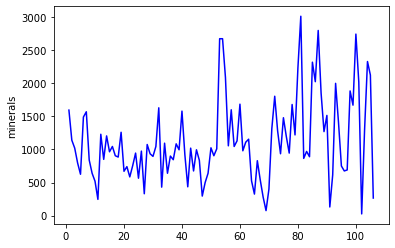

In [127]:
plt.plot('mineral_count', data=learningCollectMineralsAndGasResultsV2, color='blue')
plt.ylabel('minerals')
plt.show()

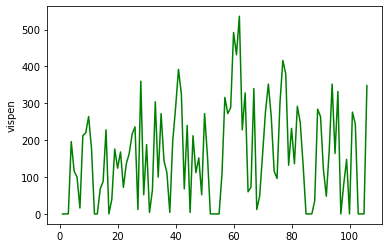

In [128]:
plt.plot('vispen_count', data=learningCollectMineralsAndGasResultsV2, color='green')
plt.ylabel('vispen')
plt.show()

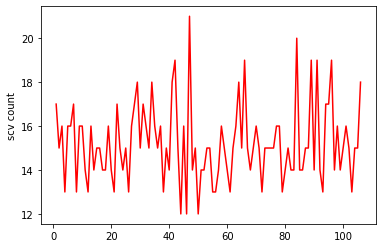

In [129]:
plt.plot('scv_count', data=learningCollectMineralsAndGasResultsV2, color='red')
plt.ylabel('scv count')
plt.show()

In [130]:
# This is was an unsuccessfull experiment. there was just changed a littl bit state values

In [131]:
# version 3 for collect minerals and gas v2

In [132]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_BUILD_REFINERY = 'buildRefinery'
ACTION_SELECT_COMMAND_CENTER = 'selectCommandCenter'
ACTION_TRAIN_SCV = 'trainScv'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'

smart_actions_learning_collect_minerals_and_gas_v3 = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_BUILD_REFINERY,
    ACTION_SELECT_COMMAND_CENTER,
    ACTION_TRAIN_SCV,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV
]

In [133]:
learningCollectMineralsAndGasTableV3.rename(columns= {
    '0': smart_actions_learning_collect_minerals_and_gas_v3[0],
    '1': smart_actions_learning_collect_minerals_and_gas_v3[1],
    '2': smart_actions_learning_collect_minerals_and_gas_v3[2],
    '3': smart_actions_learning_collect_minerals_and_gas_v3[3],
    '4': smart_actions_learning_collect_minerals_and_gas_v3[4],
    '5': smart_actions_learning_collect_minerals_and_gas_v3[5],
    '6': smart_actions_learning_collect_minerals_and_gas_v3[6],
    '7': smart_actions_learning_collect_minerals_and_gas_v3[7],
})

,donothing,selectWorker,gather,buildRefinery,selectCommandCenter,trainScv,buildSupplyDepot,selectScv
state,,,,,,,,
"[50, 0, 15, 12, 0]",0.005530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[50, 0, 15, 12, 12]",0.034638,0.034573,0.036234,0.034528,0.034639,0.033055,0.033845,0.034361
"[0, 0, 15, 12, 12]",0.003860,0.002750,0.033733,0.003135,0.003895,0.006807,0.004555,0.003361
"[0, 0, 15, 12, 11]",0.003010,0.000793,0.051538,0.000809,0.001882,0.001647,0.001068,0.001069
"[0, 0, 15, 12, 10]",0.000000,0.000000,0.014459,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
"[760, 132, 31, 22, 5]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000
"[765, 132, 31, 22, 5]",0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[770, 132, 31, 22, 5]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000


In [134]:
learningCollectMineralsAndGasResultsV3 = learningCollectMineralsAndGasResultsV3.dropna(subset=['mineral_count'])
learningCollectMineralsAndGasResultsV3

,mineral_count,vispen_count,scv_count,reward
1,3060.0,440.0,31.0,20.0
2,2985.0,612.0,23.0,10.0
3,2010.0,288.0,23.0,5.0
4,2390.0,512.0,23.0,0.0
5,1580.0,464.0,22.0,10.0
...,...,...,...,...
691,1725.0,464.0,24.0,5.0
692,2225.0,380.0,15.0,5.0
693,1050.0,296.0,16.0,0.0
694,2805.0,352.0,30.0,5.0


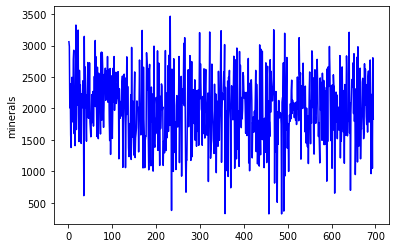

In [135]:
plt.plot('mineral_count', data=learningCollectMineralsAndGasResultsV3, color='blue')
plt.ylabel('minerals')
plt.show()

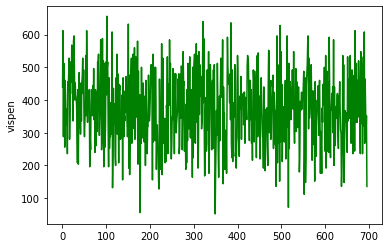

In [136]:
plt.plot('vispen_count', data=learningCollectMineralsAndGasResultsV3, color='green')
plt.ylabel('vispen')
plt.show()

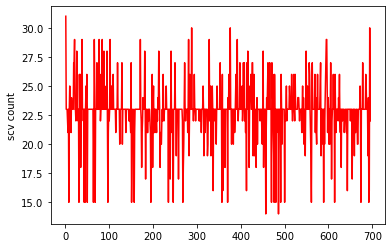

In [137]:
plt.plot('scv_count', data=learningCollectMineralsAndGasResultsV3, color='red')
plt.ylabel('scv count')
plt.show()

In [138]:
# last example was more greate. because it was trying to optimize getting minerals and vispen, and train of workers.

In [139]:
# build marines
# this task was harder because here we need to collect minerals, build army, build workers, build buildings, main goal to collect more army units, here was 5 testsACTION_DO_NOTHING = 'donothing'


In [140]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_SELECT_COMMAND_CENTER = 'selectCommandCenter'
ACTION_TRAIN_SCV = 'trainScv'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'
ACTION_BUILD_BARRACKS = 'buildBarracks'
ACTION_TRAIN_MARINE = 'trainMarine'
ACTION_SELECT_BARRACKS = 'selectBarracks'

smart_actions_learning_build_marines = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_SELECT_COMMAND_CENTER,
    ACTION_TRAIN_SCV,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV,
    ACTION_BUILD_BARRACKS,
    ACTION_TRAIN_MARINE,
    ACTION_SELECT_BARRACKS
]

In [141]:
learningBuildMarinesTable.rename(columns= {
    '0': smart_actions_learning_build_marines[0],
    '1': smart_actions_learning_build_marines[1],
    '2': smart_actions_learning_build_marines[2],
    '3': smart_actions_learning_build_marines[3],
    '4': smart_actions_learning_build_marines[4],
    '5': smart_actions_learning_build_marines[5],
    '6': smart_actions_learning_build_marines[6],
    '7': smart_actions_learning_build_marines[7],
    '8': smart_actions_learning_build_marines[8],
    '9': smart_actions_learning_build_marines[9],
})

,donothing,selectWorker,gather,selectCommandCenter,trainScv,buildSupplyDepot,selectScv,buildBarracks,trainMarine,selectBarracks
state,,,,,,,,,,
"[0, 0, 0]",2.523852e-04,2.158137e-04,2.157970e-04,2.158802e-04,2.158611e-04,2.158617e-04,2.157888e-04,2.159390e-04,2.157686e-04,2.157969e-04
"[0, 0, 1]",3.406548e-03,2.561722e-03,2.076843e-03,2.833773e-03,3.111131e-03,3.021215e-03,3.588520e-03,4.424595e-03,2.811858e-03,2.870165e-03
"[1, 0, 1]",2.157138e-02,2.158124e-02,2.158805e-02,2.157956e-02,2.158785e-02,2.170657e-02,2.157186e-02,2.158575e-02,2.156423e-02,2.157364e-02
"[2, 0, 1]",2.622541e-02,2.624212e-02,2.624229e-02,2.623773e-02,2.638455e-02,2.625143e-02,2.624525e-02,2.624423e-02,2.623893e-02,2.623650e-02
"[2, 1, 1]",4.954126e-02,4.863350e-02,4.899216e-02,4.915316e-02,6.534984e-02,4.716031e-02,4.748139e-02,5.434664e-02,4.927369e-02,5.444709e-02
"[0, 0, 2]",5.309233e-04,4.404271e-04,4.248068e-04,5.453962e-04,5.203996e-04,4.928110e-04,4.765957e-04,8.795755e-04,4.075223e-04,5.087832e-04
"[1, 0, 2]",4.402828e-03,4.875861e-03,4.393755e-03,4.415395e-03,4.397633e-03,4.341058e-03,4.423969e-03,5.180150e-03,4.371823e-03,4.764668e-03
"[2, 0, 2]",2.764492e-02,2.758775e-02,2.819832e-02,2.790562e-02,2.841468e-02,2.791055e-02,2.771607e-02,2.784977e-02,5.471286e-02,2.790422e-02
"[2, 1, 2]",5.869410e-02,5.909239e-02,5.949256e-02,5.892091e-02,5.945446e-02,5.998688e-02,5.858655e-02,5.867610e-02,1.143188e-01,5.895154e-02


In [142]:
learningBuildMarinesResults = learningBuildMarinesResults.dropna(subset=['reward'])
learningBuildMarinesResults

,reward
1,1.0
2,6.0
3,1.0
4,2.0
5,2.0
...,...
573,0.0
574,2.0
575,5.0
576,2.0


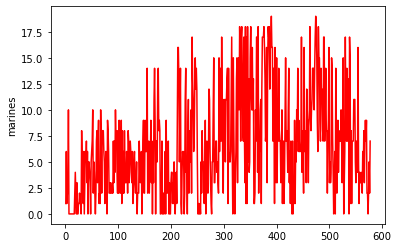

In [143]:
plt.plot('reward', data=learningBuildMarinesResults, color='red')
plt.ylabel('marines')
plt.show()

In [144]:
# here we used to check how many marines can be build giving reward just for building marines

In [145]:
#v2

In [146]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'
ACTION_BUILD_BARRACKS = 'buildBarracks'
ACTION_TRAIN_MARINE = 'trainMarine'
ACTION_SELECT_BARRACKS = 'selectBarracks'

smart_actions_learning_build_marines_v2 = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV,
    ACTION_BUILD_BARRACKS,
    ACTION_TRAIN_MARINE,
    ACTION_SELECT_BARRACKS
]

In [147]:
learningBuildMarinesTableV2.rename(columns= {
    '0': smart_actions_learning_build_marines_v2[0],
    '1': smart_actions_learning_build_marines_v2[1],
    '2': smart_actions_learning_build_marines_v2[2],
    '3': smart_actions_learning_build_marines_v2[3],
    '4': smart_actions_learning_build_marines_v2[4],
    '5': smart_actions_learning_build_marines_v2[5],
    '6': smart_actions_learning_build_marines_v2[6],
    '7': smart_actions_learning_build_marines_v2[7],
})

,donothing,selectWorker,gather,buildSupplyDepot,selectScv,buildBarracks,trainMarine,selectBarracks
state,,,,,,,,
"[0, 0, 0]",0.000066,0.000066,0.000066,0.000093,6.626833e-05,0.000066,0.000067,0.000066
"[0, 0, 1]",0.000772,0.000716,0.000828,0.000810,7.634309e-04,0.001315,0.000638,0.000728
"[1, 0, 1]",0.002280,0.002271,0.002329,0.002270,2.270956e-03,0.002269,0.002267,0.002272
"[1, 0, 2]",0.007667,0.007665,0.007659,0.007666,7.668999e-03,0.007666,0.007666,0.007792
"[1, 0, 3]",0.010238,0.010444,0.010353,0.010279,1.044279e-02,0.020221,0.010362,0.009909
...,...,...,...,...,...,...,...,...
"[1, 30, 5]",0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.010000,0.000000
"[1, 31, 5]",0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.010000,0.000000
"[1, 32, 5]",0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.010000,0.000000


In [148]:
learningBuildMarinesResultsV2 = learningBuildMarinesResultsV2.dropna(subset=['reward'])
learningBuildMarinesResultsV2

,reward
1,41.0
2,15.0
3,9.0
4,2.0
5,5.0
...,...
485,13.0
486,8.0
487,7.0
488,25.0


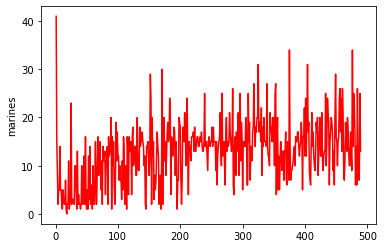

In [149]:
plt.plot('reward', data=learningBuildMarinesResultsV2, color='red')
plt.ylabel('marines')
plt.show()

In [150]:
# we see that here situation got better, but at the same time it is not good result

In [151]:
#v3 I used to check how it will study if we will stop to build workers here is result:

In [152]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'
ACTION_BUILD_BARRACKS = 'buildBarracks'
ACTION_TRAIN_MARINE = 'trainMarine'
ACTION_SELECT_BARRACKS = 'selectBarracks'

smart_actions_learning_build_marines_v3 = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV,
    ACTION_BUILD_BARRACKS,
    ACTION_TRAIN_MARINE,
    ACTION_SELECT_BARRACKS
]

In [153]:
learningBuildMarinesTableV3.rename(columns= {
    '0': smart_actions_learning_build_marines_v3[0],
    '1': smart_actions_learning_build_marines_v3[1],
    '2': smart_actions_learning_build_marines_v3[2],
    '3': smart_actions_learning_build_marines_v3[3],
    '4': smart_actions_learning_build_marines_v3[4],
    '5': smart_actions_learning_build_marines_v3[5],
    '6': smart_actions_learning_build_marines_v3[6],
    '7': smart_actions_learning_build_marines_v3[7],
})

,donothing,selectWorker,gather,buildSupplyDepot,selectScv,buildBarracks,trainMarine,selectBarracks
state,,,,,,,,
"[0, 0, 0]",0.000096,0.000096,0.000114,0.000096,0.000096,0.000096,0.000096,0.000096
"[0, 0, 1]",0.001994,0.002010,0.001975,0.001975,0.001984,0.002028,0.001980,0.002011
"[1, 0, 1]",0.004063,0.004061,0.004059,0.004069,0.004063,0.004060,0.004063,0.004060
"[1, 0, 2]",0.004584,0.004553,0.004569,0.004621,0.004976,0.004971,0.004579,0.005225
"[2, 0, 2]",0.018805,0.018793,0.018802,0.018814,0.019093,0.018817,0.018802,0.018804
...,...,...,...,...,...,...,...,...
"[1, 22, 4]",0.000000,0.000000,0.002211,0.000000,0.000000,0.000000,0.000000,0.000000
"[1, 23, 4]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
"[1, 24, 4]",0.000000,0.000000,0.000000,0.000518,0.000000,0.000000,0.000000,0.000000


In [154]:
learningBuildMarinesResultsV3  = learningBuildMarinesResultsV3.dropna(subset=['reward'])
learningBuildMarinesResultsV3

,reward
1,43.0
2,3.0
3,3.0
4,9.0
5,5.0
...,...
1218,40.0
1219,22.0
1220,22.0
1221,18.0


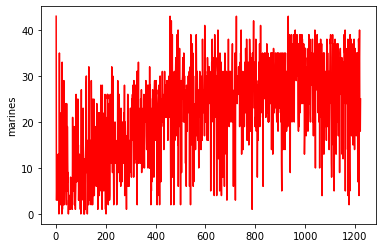

In [155]:
plt.plot('reward', data=learningBuildMarinesResultsV3, color='red')
plt.ylabel('marines')
plt.show()

In [156]:
#so we stopped to build workers and count of marines started to grow. So now let try to optimize the grow of marines in case when we can build workers

In [157]:
#v4

In [158]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_SELECT_COMMAND_CENTER = 'selectCommandCenter'
ACTION_TRAIN_SCV = 'trainScv'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'
ACTION_BUILD_BARRACKS = 'buildBarracks'
ACTION_TRAIN_MARINE = 'trainMarine'
ACTION_SELECT_BARRACKS = 'selectBarracks'

smart_actions_learning_build_marines_v4 = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_SELECT_COMMAND_CENTER,
    ACTION_TRAIN_SCV,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV,
    ACTION_BUILD_BARRACKS,
    ACTION_TRAIN_MARINE,
    ACTION_SELECT_BARRACKS
]

In [159]:
learningBuildMarinesTableV4.rename(columns= {
    '0': smart_actions_learning_build_marines_v4[0],
    '1': smart_actions_learning_build_marines_v4[1],
    '2': smart_actions_learning_build_marines_v4[2],
    '3': smart_actions_learning_build_marines_v4[3],
    '4': smart_actions_learning_build_marines_v4[4],
    '5': smart_actions_learning_build_marines_v4[5],
    '6': smart_actions_learning_build_marines_v4[6],
    '7': smart_actions_learning_build_marines_v4[7],
    '8': smart_actions_learning_build_marines_v4[8],
    '9': smart_actions_learning_build_marines_v4[9],
})

,donothing,selectWorker,gather,selectCommandCenter,trainScv,buildSupplyDepot,selectScv,buildBarracks,trainMarine,selectBarracks
state,,,,,,,,,,
"[0, 0, 12, 0, 0]",5.400173,5.400224,5.400171,5.400196,5.058207,5.400185,5.400189,5.400183,6.000368,5.400284
"[0, 0, 13, 0, 0]",5.399812,5.399797,5.399757,5.399714,5.090797,5.399775,5.399702,5.399760,6.000228,5.399783
"[0, 1, 13, 0, 0]",4.681915,4.711163,4.435678,4.656789,4.369075,4.655486,4.471427,4.641458,6.007166,4.592180
"[1, 1, 13, 0, 0]",3.768168,4.133518,4.126711,3.965868,3.857555,3.918981,4.016529,4.166969,5.917086,4.082631
"[2, 1, 13, 0, 0]",2.072742,1.811922,1.796686,1.871443,2.070674,1.843423,1.574379,2.024514,5.771456,1.841004
...,...,...,...,...,...,...,...,...,...,...
"[2, 5, 22, 9, 3]",0.000964,0.000000,0.000000,0.001070,-0.006000,0.000000,0.001070,0.000000,0.124211,0.000000
"[2, 5, 25, 9, 3]",0.002014,0.004886,0.000538,0.005886,-0.008370,0.005676,0.000000,0.009009,0.662173,0.003703
"[2, 5, 26, 9, 3]",0.000000,0.000000,0.003000,0.000000,-0.006000,0.000000,0.000000,0.000000,0.000000,0.000000


In [160]:
learningBuildMarinesResultsV4 = learningBuildMarinesResultsV4.dropna(subset=['reward'])
learningBuildMarinesResultsV4

,reward,workers,supply_depot,barracks
1,8.0,16.0,5.0,2.0
2,13.0,16.0,5.0,2.0
3,28.0,27.0,5.0,2.0
4,9.0,20.0,4.0,2.0
5,1.0,20.0,5.0,2.0
...,...,...,...,...
2874,37.0,18.0,5.0,2.0
2875,9.0,27.0,5.0,2.0
2876,14.0,22.0,4.0,2.0
2877,0.0,13.0,5.0,0.0


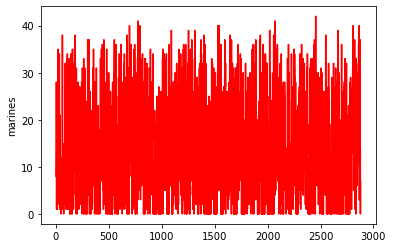

In [161]:
plt.plot('reward', data=learningBuildMarinesResultsV4, color='red')
plt.ylabel('marines')
plt.show()

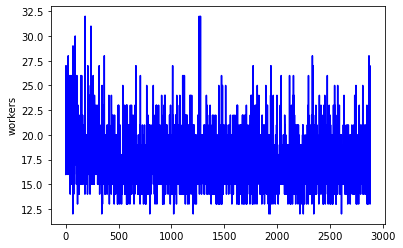

In [162]:
plt.plot('workers', data=learningBuildMarinesResultsV4, color='blue')
plt.ylabel('workers')
plt.show()

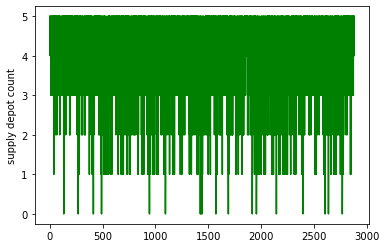

In [163]:
plt.plot('supply_depot', data=learningBuildMarinesResultsV4, color='green')
plt.ylabel('supply depot count')
plt.show()

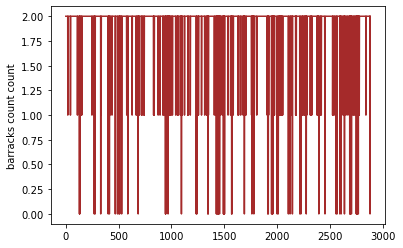

In [164]:
plt.plot('barracks', data=learningBuildMarinesResultsV4, color='brown')
plt.ylabel('barracks count count')
plt.show()

In [165]:
# in this case we started to give rewards for new marines, new barrackas and for case when workers are busy, but also give taxes for building workers

In [166]:
#v5

In [167]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_SELECT_COMMAND_CENTER = 'selectCommandCenter'
ACTION_TRAIN_SCV = 'trainScv'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'
ACTION_BUILD_BARRACKS = 'buildBarracks'
ACTION_TRAIN_MARINE = 'trainMarine'
ACTION_SELECT_BARRACKS = 'selectBarracks'

smart_actions_learning_build_marines_v5 = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_SELECT_COMMAND_CENTER,
    ACTION_TRAIN_SCV,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV,
    ACTION_BUILD_BARRACKS,
    ACTION_TRAIN_MARINE,
    ACTION_SELECT_BARRACKS
]

In [168]:
learningBuildMarinesTableV5.rename(columns= {
    '0': smart_actions_learning_build_marines_v5[0],
    '1': smart_actions_learning_build_marines_v5[1],
    '2': smart_actions_learning_build_marines_v5[2],
    '3': smart_actions_learning_build_marines_v5[3],
    '4': smart_actions_learning_build_marines_v5[4],
    '5': smart_actions_learning_build_marines_v5[5],
    '6': smart_actions_learning_build_marines_v5[6],
    '7': smart_actions_learning_build_marines_v5[7],
    '8': smart_actions_learning_build_marines_v5[8],
    '9': smart_actions_learning_build_marines_v5[9],
})

,donothing,selectWorker,gather,selectCommandCenter,trainScv,buildSupplyDepot,selectScv,buildBarracks,trainMarine,selectBarracks
state,,,,,,,,,,
"[0, 0, 12, 0, 0]",0.055751,0.055779,0.055743,0.058173,-0.519717,0.055741,0.055765,0.055774,0.055739,0.055787
"[0, 1, 12, 0, 0]",0.051724,0.049225,0.049181,0.052953,-0.534624,0.050237,0.056509,0.051350,0.052576,0.054223
"[0, 1, 13, 0, 0]",0.361002,0.376473,0.373504,0.363394,-0.105809,0.359268,0.311717,0.367704,0.362358,0.417004
"[0, 0, 13, 0, 0]",0.244506,0.247427,0.246572,0.461054,-0.287677,0.244500,0.245374,0.249244,0.242539,0.244881
"[0, 0, 14, 0, 0]",1.557089,1.556406,1.555531,1.386103,1.305007,1.556768,1.555785,1.556473,1.556323,1.555867
...,...,...,...,...,...,...,...,...,...,...
"[0, 1, 15, 1, 6]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035910,0.000000
"[0, 0, 15, 1, 6]",0.000000,0.000000,0.005101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[0, 1, 14, 1, 6]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016988,0.000000,0.000000,0.000000


In [169]:
learningBuildMarinesResultsV5 = learningBuildMarinesResultsV5.dropna(subset=['reward'])
learningBuildMarinesResultsV5

,reward,workers
1,27.0,28.0
2,29.0,26.0
3,37.0,18.0
4,33.0,12.0
5,19.0,12.0
...,...,...
3493,18.0,14.0
3494,25.0,14.0
3495,38.0,17.0
3496,40.0,15.0


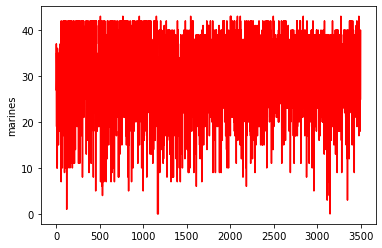

In [170]:
plt.plot('reward', data=learningBuildMarinesResultsV5, color='red')
plt.ylabel('marines')
plt.show()


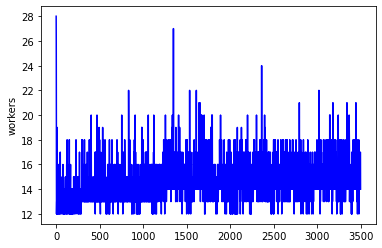

In [171]:
plt.plot('workers', data=learningBuildMarinesResultsV5, color='blue')
plt.ylabel('workers')
plt.show()

In [172]:
# marine rush

In [173]:
ACTION_DO_NOTHING = 'donothing'
ACTION_SELECT_WORKER = 'selectWorker'
ACTION_GATHER = 'gather'
ACTION_SELECT_SCV = 'selectScv'
ACTION_BUILD_SUPPLY_DEPOT = 'buildSupplyDepot'
ACTION_BUILD_BARRACKS = 'buildBarracks'
ACTION_TRAIN_MARINE = 'trainMarine'
ACTION_SELECT_BARRACKS = 'selectBarracks'
ACTION_SELECT_ARMY = 'selectArmy'
ACTION_ATTACK_ENEMY = 'attackEnemy'

smart_actions_marine_rush = [
    ACTION_DO_NOTHING,
    ACTION_SELECT_WORKER,
    ACTION_GATHER,
    ACTION_BUILD_SUPPLY_DEPOT,
    ACTION_SELECT_SCV,
    ACTION_BUILD_BARRACKS,
    ACTION_TRAIN_MARINE,
    ACTION_SELECT_BARRACKS,
    ACTION_SELECT_ARMY,
    ACTION_ATTACK_ENEMY
]

In [174]:
learningMarinesRushTable.rename(columns= {
    '0': smart_actions_marine_rush[0],
    '1': smart_actions_marine_rush[1],
    '2': smart_actions_marine_rush[2],
    '3': smart_actions_marine_rush[3],
    '4': smart_actions_marine_rush[4],
    '5': smart_actions_marine_rush[5],
    '6': smart_actions_marine_rush[6],
    '7': smart_actions_marine_rush[7],
    '8': smart_actions_marine_rush[8],
    '9': smart_actions_marine_rush[9],
})

,donothing,selectWorker,gather,buildSupplyDepot,selectScv,buildBarracks,trainMarine,selectBarracks,selectArmy,attackEnemy
state,,,,,,,,,,
"[0, 0, 0, 0, 0, 0, 0, 0]",0.003844,0.003421,0.003012,0.003846,2.109658e-02,0.003971,0.002229,0.004012,3.235959e-03,3.930598e-03
"[0, 0, 0, 0, 0, 0, 1, 0]",0.036202,0.034901,0.034703,0.053998,3.607067e-02,0.037709,0.033575,0.033453,3.788155e-02,4.040465e-02
"[0, 0, 0, 0, 0, 1, 1, 0]",0.341944,0.320092,0.316346,0.358649,3.340560e-01,0.534066,0.339951,0.338409,3.438331e-01,3.179812e-01
"[0, 1, 0, 0, 0, 1, 1, 0]",0.203000,0.188889,0.169242,0.158271,2.004840e-01,0.966740,0.162887,0.201451,2.097361e-01,2.092021e-01
"[0, 0, 0, 0, 1, 1, 1, 0]",0.282130,0.383747,0.268603,0.258982,3.248706e-01,0.357653,0.264926,1.205211,3.419462e-01,2.573555e-01
"[0, 0, 0, 0, 1, 1, 0, 1]",1.267538,1.246836,1.248128,1.249398,1.072545e+00,1.252210,1.682411,1.250439,1.229025e+00,1.255102e+00
"[0, 1, 0, 0, 1, 1, 0, 1]",2.023181,1.636644,1.960366,2.099777,1.783882e+00,1.995474,2.671662,2.152563,1.927175e+00,1.960192e+00
"[0, 1, 0, 0, 1, 1, 1, 0]",1.040656,1.102935,1.105885,0.939667,1.134185e+00,1.105485,0.905201,2.317982,8.401542e-01,1.105625e+00
"[1, 1, 0, 0, 1, 1, 0, 1]",1.297605,1.233574,1.262447,1.232490,4.856951e+00,1.243872,1.506819,1.312634,1.016355e+00,1.695439e+00


In [175]:
learningMarinesRushResults = learningMarinesRushResults.dropna(subset=['reward'])
learningMarinesRushResults

,reward
1,1.0
2,-1.0
3,-1.0
4,1.0
5,-1.0
...,...
426,1.0
427,1.0
428,-1.0
429,-1.0


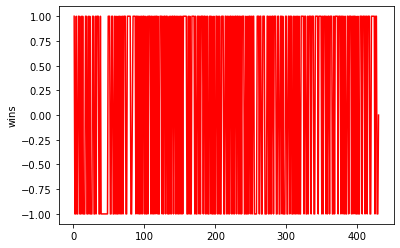

In [176]:
plt.plot('reward', data=learningMarinesRushResults, color='red')
plt.ylabel('wins')
plt.show()

In [177]:
learningMarineRushValues =learningMarinesRushResults['reward'].value_counts()

In [178]:
learningMarineRushValues

 1.0    238
-1.0    188
 0.0      2
Name: reward, dtype: int64

In [179]:
learningMarineRushValues[-1]

188

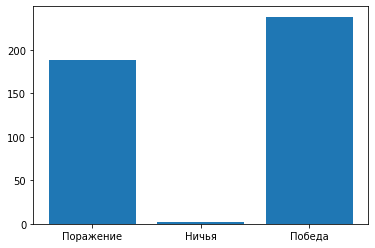

In [180]:
plt.bar([1, -1 , 0], learningMarineRushValues)
plt.xticks([1, -1 , 0], ('Победа', 'Поражение', 'Ничья'))
plt.show()